# Part 2: Descriptive Analytics
In this part, three KPIs are calculated in the the first section for the next bike data for each city. These include:
1. total trip durations per hour 
2. total distance per hour 
3. total number of used bikes per hour

Based on these data, section 2 examines the data for rental patterns.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import datetime

# 1. Hourly KPIs

## 1.1 Berlin

In [2]:
# importing data sets
df = pd.read_csv(r"C:\Users\geibe\Desktop\aa_project-main\Abgabe\Data\berlin_final.csv")
df_w = pd.read_csv(r"C:\Users\geibe\Desktop\aa_project-main\Abgabe\Data\berlin_weather.csv")
df_w.datetime = pd.to_datetime(df_w.datetime)

**1st KPI: Absolute number of trips per hour**

In [3]:
df[(df["month"] == 2) & (df["date"] == 1) & (df["hour"] == 2)].size

34

In [4]:
def get_trips(datetime):
    return df[(df["month"] == datetime.month) & (df["date"] == datetime.day) & (df["hour"] == datetime.hour)].size

In [5]:
df_w["num_trips"] = df_w["datetime"].apply(get_trips)

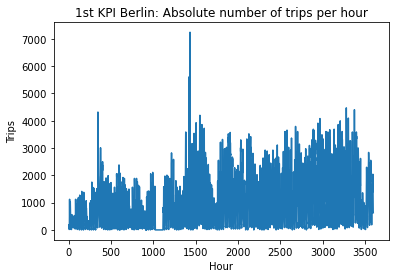

<Figure size 432x288 with 0 Axes>

In [6]:
data_w = pd.DataFrame()
data_w['num_trips'] = df_w.num_trips.astype(int)
data_w.sort_index(inplace=True)
plt.plot(data_w.index, data_w.num_trips, label='Trips per hour')
plt.title('1st KPI Berlin: Absolute number of trips per hour')
plt.ylabel('Trips')
plt.xlabel('Hour')
plt.show()

plt.savefig('kpi1_b.png')

**2nd KPI: Trip duration per hour**

In [7]:
def get_duration(datetime):
    sum = 0
    df_duration = df[(df["month"] == datetime.month) & (df["date"] == datetime.day) & (df["hour"] == datetime.hour)]
    for duration in df_duration["trip_duration"]:
        sum = sum + duration
    return sum

In [8]:
df_w["duration"] = df_w["datetime"].apply(get_duration)

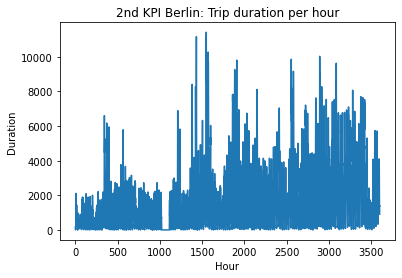

<Figure size 432x288 with 0 Axes>

In [9]:
data_w = pd.DataFrame()
data_w['duration'] = df_w.duration
data_w.sort_index(inplace=True)
plt.plot(data_w.index, data_w.duration, label='Trips per hour')
plt.title('2nd KPI Berlin: Trip duration per hour')
plt.ylabel('Duration')
plt.xlabel('Hour')
plt.show()

plt.savefig('kpi2_b.png')

**3rd KPI: Distance per hour**

In [10]:
def get_distance(datetime):
    sum = 0
    df_distance = df[(df["month"] == datetime.month) & (df["date"] == datetime.day) & (df["hour"] == datetime.hour)]
    for distance in df_distance["distance"]:
        sum = sum + distance
    return sum

df_w["distance"] = df_w["datetime"].apply(get_distance)

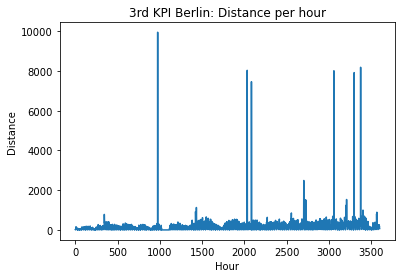

<Figure size 432x288 with 0 Axes>

In [11]:
data_w = pd.DataFrame()
data_w['distance'] = df_w.distance
data_w.sort_index(inplace=True)
plt.plot(data_w.index, data_w.distance, label='Trips per hour')
plt.title('3rd KPI Berlin: Distance per hour')
plt.ylabel('Distance')
plt.xlabel('Hour')
plt.show()

plt.savefig('kpi3_b.png')

## 1.2 Frankfurt

**1st KPI: Absolute number of trips per hour**

In [12]:
df = pd.read_csv(r"C:\Users\geibe\Desktop\aa_project-main\Abgabe\Data\frankfurt_final.csv")
df_w = pd.read_csv(r"C:\Users\geibe\Desktop\aa_project-main\Abgabe\Data\frankfurt_weather.csv")
df_w.datetime = pd.to_datetime(df_w.datetime)

In [13]:
df[(df["month"] == 2) & (df["date"] == 1) & (df["hour"] == 2)].size

0

In [14]:
def get_trips(datetime):
    return df[(df["month"] == datetime.month) & (df["date"] == datetime.day) & (df["hour"] == datetime.hour)].size


In [15]:
df_w["num_trips"] = df_w["datetime"].apply(get_trips)

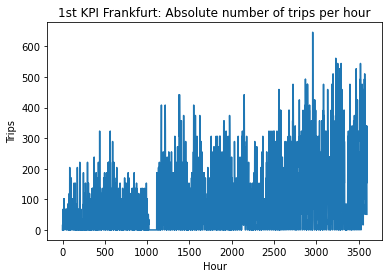

<Figure size 432x288 with 0 Axes>

In [16]:
data_w = pd.DataFrame()
data_w['num_trips'] = df_w.num_trips.astype(int)
data_w.sort_index(inplace=True)
plt.plot(data_w.index, data_w.num_trips, label='Trips per hour')
plt.title('1st KPI Frankfurt: Absolute number of trips per hour')
plt.ylabel('Trips')
plt.xlabel('Hour')
plt.show()

plt.savefig('kpi1_f.png')

**2nd KPI: Trip duration per hour**

In [17]:
df_w["duration"] = df_w["datetime"].apply(get_duration)

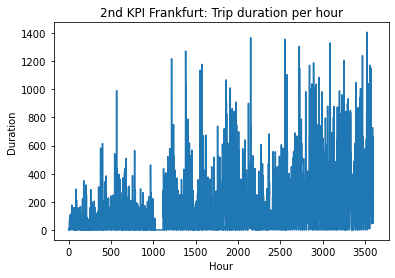

<Figure size 432x288 with 0 Axes>

In [18]:
data_w = pd.DataFrame()
data_w['duration'] = df_w.duration
data_w.sort_index(inplace=True)
plt.plot(data_w.index, data_w.duration, label='Trips per hour')
plt.title('2nd KPI Frankfurt: Trip duration per hour')
plt.ylabel('Duration')
plt.xlabel('Hour')
plt.show()

plt.savefig('kpi2_f.png')

**3rd KPI: Distance per hour**

In [19]:
df_w["distance"] = df_w["datetime"].apply(get_distance)

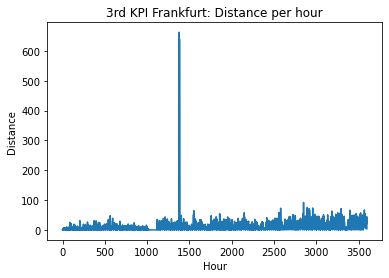

<Figure size 432x288 with 0 Axes>

In [20]:
data_w = pd.DataFrame()
data_w['distance'] = df_w.distance
data_w.sort_index(inplace=True)
plt.plot(data_w.index, data_w.distance, label='Trips per hour')
plt.title('3rd KPI Frankfurt: Distance per hour')
plt.ylabel('Distance')
plt.xlabel('Hour')
plt.show()

plt.savefig('kpi3_f.png')

# 2. Rental Patterns

In [21]:
df_b = pd.read_csv(r"C:\Users\geibe\Documents\aa_project-main\aa_project-main\Data\berlin_final.csv")
df_bw = pd.read_csv(r"C:\Users\geibe\Documents\aa_project-main\aa_project-main\Data\berlin_weather.csv")
df_f = pd.read_csv(r"C:\Users\geibe\Documents\aa_project-main\aa_project-main\Data\frankfurt_final.csv")
df_fw = pd.read_csv(r"C:\Users\geibe\Documents\aa_project-main\aa_project-main\Data\frankfurt_weather.csv")

In [22]:
def replace_minutes(dt):
    return dt.replace(minute=0)

In [23]:
df_b.rename(columns={'day':'datetime'}, inplace=True)
df_b.datetime = pd.to_datetime(df_b.datetime)
df_bw.datetime = pd.to_datetime(df_bw.datetime)
# df.datetime = df['datetime'].astype('datetime64')

In [24]:
df_f.rename(columns={'day':'datetime'}, inplace=True)
df_f.datetime = pd.to_datetime(df_f.datetime)
df_fw.datetime = pd.to_datetime(df_fw.datetime)
# df.datetime = df['datetime'].astype('datetime64')

In [25]:
df_b.datetime = df_b.datetime.apply(replace_minutes)

In [26]:
df_f.datetime = df_f.datetime.apply(replace_minutes)

In [27]:
df_b = pd.merge(df_b, df_bw, how="left", on =["datetime"])

In [28]:
df_f = pd.merge(df_f, df_fw, how="left", on =["datetime"])

## 2.1 Trip Count

### Berlin:

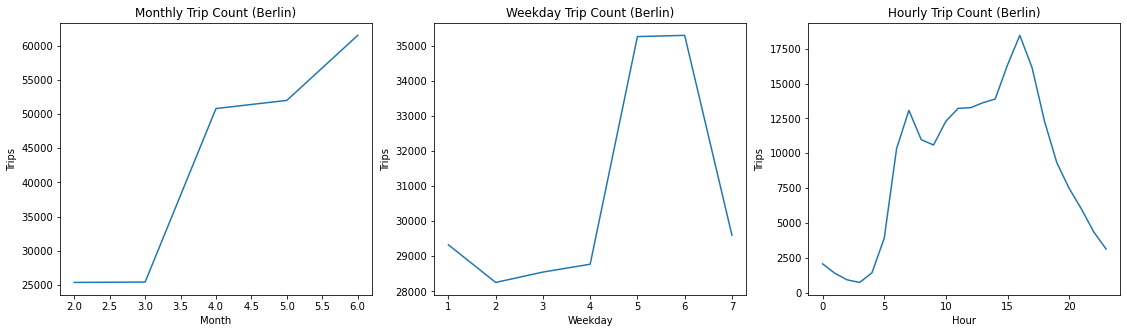

In [29]:
diag, axes = plt.subplots(1, 3, figsize=(19, 5))

# subplot 1: monthly trip count
data_m = pd.DataFrame()
data_m['month'] = df_b.month.value_counts()
data_m.sort_index(inplace=True)

axes[0].plot(data_m.index, data_m.month, label='Trips in each Month')
axes[0].set_title("Monthly Trip Count (Berlin)")
axes[0].set_xlabel('Month') 
axes[0].set_ylabel('Trips')

# subplot 2: weekday trip count
data_w = pd.DataFrame()
data_w['weekday'] = df_b.weekday.value_counts()
data_w.sort_index(inplace=True)

axes[1].plot(data_w.index, data_w.weekday, label='Trips on each Weekday')
axes[1].set_title("Weekday Trip Count (Berlin)")
axes[1].set_xlabel('Weekday') 
axes[1].set_ylabel('Trips')

# subplot 3: daily trip count
data_d = pd.DataFrame()
data_d['hour'] = df_b.hour.value_counts()
data_d.sort_index(inplace=True)

axes[2].plot(data_d.index, data_d.hour, label='Trips in each hour')
axes[2].set_title("Hourly Trip Count (Berlin)")
axes[2].set_xlabel('Hour') 
axes[2].set_ylabel('Trips')

diag.savefig('rp_trips_count_b.png')

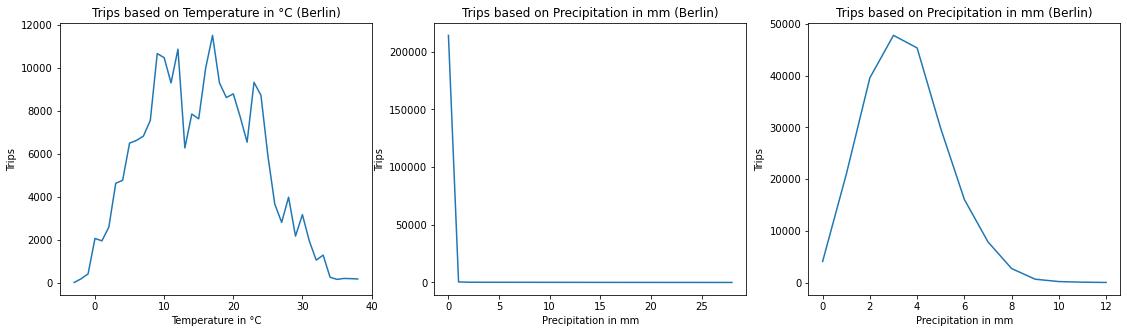

In [30]:
diag, axes = plt.subplots(1, 3, figsize=(19, 5))
data_t = pd.DataFrame()
data_p = pd.DataFrame()
data_w = pd.DataFrame()

# subplot 1: Trips based on Temperature in °C
df_b.temperature = df_b.temperature.astype(int)
data_t['temp'] = df_b.temperature.value_counts()
data_t.sort_index(inplace=True)
axes[0].plot(data_t.index, data_t.temp, label='Trips fro each Temperature')
axes[0].set_title("Trips based on Temperature in °C (Berlin)")
axes[0].set_xlabel('Temperature in °C') 
axes[0].set_ylabel('Trips')

# subplot 2: Trips based on Precipitation in mm
df_b.precipitation = df_b.precipitation.astype(int)
data_p['prec'] = df_b.precipitation.value_counts()
data_p.sort_index(inplace=True)
axes[1].plot(data_p.index, data_p.prec, label='Trips fro each Precipitation')
axes[1].set_title("Trips based on Precipitation in mm (Berlin)")
axes[1].set_xlabel('Precipitation in mm') 
axes[1].set_ylabel('Trips')

# subplot 3: Trips based on Precipitation in mm
df_b.wind_speed = df_b.wind_speed.astype(int)
data_w['wind'] = df_b.wind_speed.value_counts()
data_w.sort_index(inplace=True)
axes[2].plot(data_w.index, data_w.wind, label='Trips fro each Precipitation')
axes[2].set_title("Trips based on Precipitation in mm (Berlin)")
axes[2].set_xlabel('Precipitation in mm') 
axes[2].set_ylabel('Trips')

diag.savefig('rp_trips_count_bw.png')

### Frankfurt (Main):

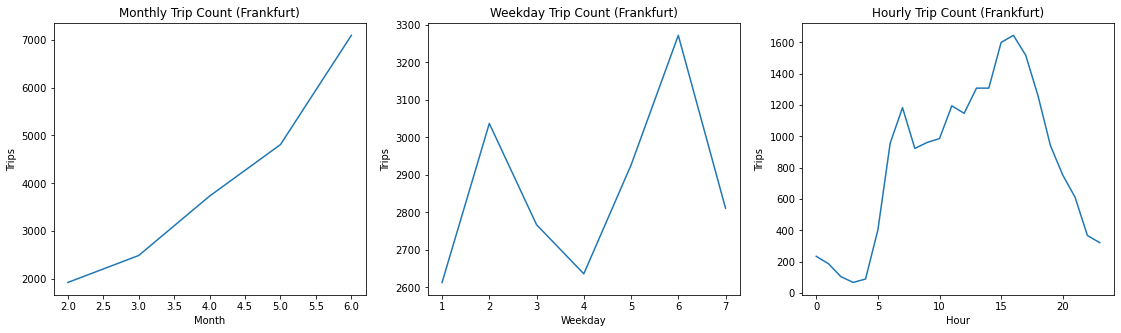

In [31]:
diag, axes = plt.subplots(1, 3, figsize=(19, 5))

# subplot 1: monthly trip count
data_m = pd.DataFrame()
data_m['month'] = df_f.month.value_counts()
data_m.sort_index(inplace=True)

axes[0].plot(data_m.index, data_m.month, label='Trips in each Month')
axes[0].set_title("Monthly Trip Count (Frankfurt)")
axes[0].set_xlabel('Month') 
axes[0].set_ylabel('Trips')

# subplot 2: weekday trip count
data_w = pd.DataFrame()
data_w['weekday'] = df_f.weekday.value_counts()
data_w.sort_index(inplace=True)

axes[1].plot(data_w.index, data_w.weekday, label='Trips on each Weekday')
axes[1].set_title("Weekday Trip Count (Frankfurt)")
axes[1].set_xlabel('Weekday') 
axes[1].set_ylabel('Trips')

# subplot 3: daily trip count
data_d = pd.DataFrame()
data_d['hour'] = df_f.hour.value_counts()
data_d.sort_index(inplace=True)

axes[2].plot(data_d.index, data_d.hour, label='Trips in each hour')
axes[2].set_title("Hourly Trip Count (Frankfurt)")
axes[2].set_xlabel('Hour') 
axes[2].set_ylabel('Trips')
diag.savefig('rp_trip_count_f.png')

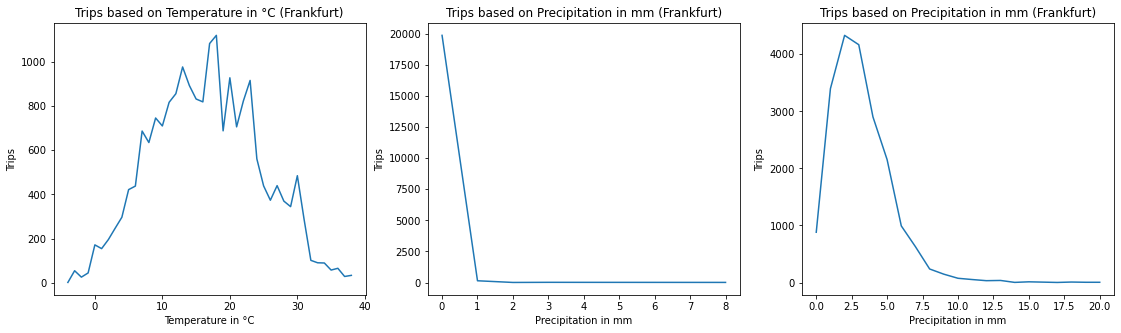

In [32]:
diag, axes = plt.subplots(1, 3, figsize=(19, 5))
data_t = pd.DataFrame()
data_p = pd.DataFrame()
data_w = pd.DataFrame()

# subplot 1: Trips based on Temperature in °C
df_f.temperature = df_f.temperature.astype(int)
data_t['temp'] = df_f.temperature.value_counts()
data_t.sort_index(inplace=True)
axes[0].plot(data_t.index, data_t.temp, label='Trips fro each Temperature')
axes[0].set_title("Trips based on Temperature in °C (Frankfurt)")
axes[0].set_xlabel('Temperature in °C') 
axes[0].set_ylabel('Trips')

# subplot 2: Trips based on Precipitation in mm
df_f.precipitation = df_f.precipitation.astype(int)
data_p['prec'] = df_f.precipitation.value_counts()
data_p.sort_index(inplace=True)
axes[1].plot(data_p.index, data_p.prec, label='Trips fro each Precipitation')
axes[1].set_title("Trips based on Precipitation in mm (Frankfurt)")
axes[1].set_xlabel('Precipitation in mm') 
axes[1].set_ylabel('Trips')

# subplot 3: Trips based on Precipitation in mm
df_f.wind_speed = df_f.wind_speed.astype(int)
data_w['wind'] = df_f.wind_speed.value_counts()
data_w.sort_index(inplace=True)
axes[2].plot(data_w.index, data_w.wind, label='Trips fro each Precipitation')
axes[2].set_title("Trips based on Precipitation in mm (Frankfurt)")
axes[2].set_xlabel('Precipitation in mm') 
axes[2].set_ylabel('Trips')

diag.savefig('rp_trip_count_fw.png')

## 2.2 Trip Duration

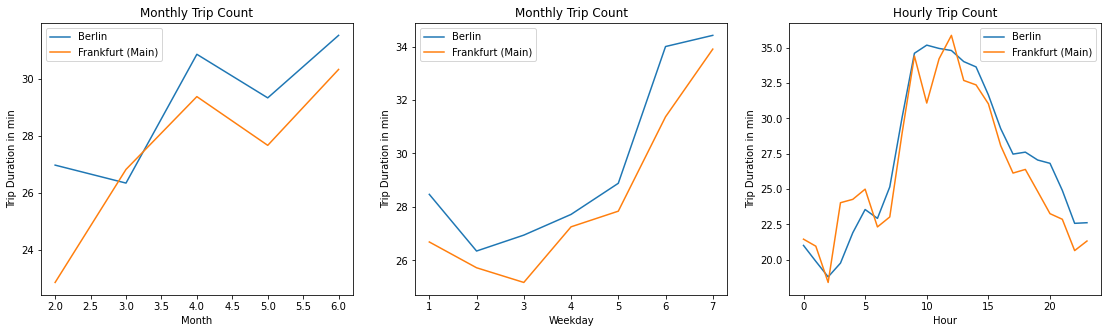

In [33]:
diag, axes = plt.subplots(1, 3, figsize=(19, 5))

# subplot 1: Mean trip duration each weekday
data_du_m1 = pd.DataFrame()
data_du_m1 = df_b[['month', 'trip_duration']]
data_du_m1 = data_du_m1.groupby([data_du_m1.month]).mean()
data_du_m1.sort_index(inplace=True)

data_du_m2 = pd.DataFrame()
data_du_m2 = df_f[['month', 'trip_duration']]
data_du_m2 = data_du_m2.groupby([data_du_m2.month]).mean()
data_du_m2.sort_index(inplace=True)

axes[0].plot(data_du_m1.index, data_du_m1.trip_duration, label='Berlin')
axes[0].plot(data_du_m2.index, data_du_m2.trip_duration, label='Frankfurt (Main)')
axes[0].legend()
axes[0].set_title("Monthly Trip Count")
axes[0].set_xlabel('Month') 
axes[0].set_ylabel('Trip Duration in min')

# subplot 2: weekday trip count
data_du_w1 = pd.DataFrame()
data_du_w1 = df_b[['weekday', 'trip_duration']]
data_du_w1 = data_du_w1.groupby([data_du_w1.weekday]).mean()
data_du_w1.sort_index(inplace=True)

data_du_w2 = pd.DataFrame()
data_du_w2 = df_f[['weekday', 'trip_duration']]
data_du_w2 = data_du_w2.groupby([data_du_w2.weekday]).mean()
data_du_w2.sort_index(inplace=True)

axes[1].plot(data_du_w1.index, data_du_w1.trip_duration, label='Berlin')
axes[1].plot(data_du_w2.index, data_du_w2.trip_duration, label='Frankfurt (Main)')
axes[1].legend()
axes[1].set_title("Monthly Trip Count")
axes[1].set_xlabel('Weekday') 
axes[1].set_ylabel('Trip Duration in min')

# subplot 3: daily trip count
data_du_d1 = pd.DataFrame()
data_du_d1 = df_b[['hour', 'trip_duration']]
data_du_d1 = data_du_d1.groupby([data_du_d1.hour]).mean()
data_du_d1.sort_index(inplace=True)

data_du_d2 = pd.DataFrame()
data_du_d2 = df_f[['hour', 'trip_duration']]
data_du_d2 = data_du_d2.groupby([data_du_d2.hour]).mean()
data_du_d2.sort_index(inplace=True)

axes[2].plot(data_du_d1.index, data_du_d1.trip_duration, label='Berlin')
axes[2].plot(data_du_d2.index, data_du_d2.trip_duration, label='Frankfurt (Main)')
axes[2].legend()
axes[2].set_title("Hourly Trip Count")
axes[2].set_xlabel('Hour') 
axes[2].set_ylabel('Trip Duration in min')

diag.savefig('rp_trip_duration_bf.png')

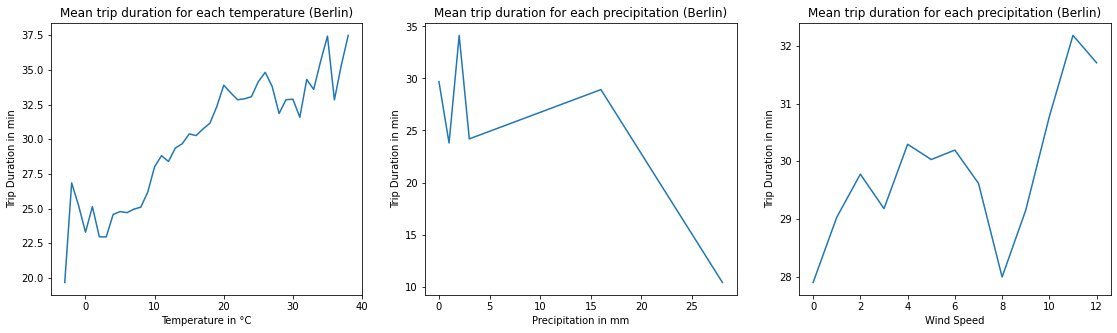

In [34]:
diag, axes = plt.subplots(1, 3, figsize=(19, 5))

# subplot 1: Mean trip duration for each temperature
data_du_t = pd.DataFrame()
data_du_t = df_b[['temperature', 'trip_duration']]
data_du_t = data_du_t.groupby([data_du_t.temperature]).mean()
data_du_t.sort_index(inplace=True)

axes[0].plot(data_du_t.index, data_du_t.trip_duration, label='Mean trip duration for each temperature')
axes[0].set_title("Mean trip duration for each temperature (Berlin)")
axes[0].set_xlabel('Temperature in °C') 
axes[0].set_ylabel('Trip Duration in min')

# subplot 2: Mean trip duration for each precipitation
data_du_p = pd.DataFrame()
data_du_p = df_b[['precipitation', 'trip_duration']]
data_du_p = data_du_p.groupby([data_du_p.precipitation]).mean()
data_du_p.sort_index(inplace=True)

axes[1].plot(data_du_p.index, data_du_p.trip_duration, label='Mean trip duration for each precipitation')
axes[1].set_title("Mean trip duration for each precipitation (Berlin)")
axes[1].set_xlabel('Precipitation in mm') 
axes[1].set_ylabel('Trip Duration in min')

# subplot 3: Mean trip duration for each wind speed
data_du_w = pd.DataFrame()
data_du_w = df_b[['wind_speed', 'trip_duration']]
data_du_w = data_du_w.groupby([data_du_w.wind_speed]).mean()
data_du_w.sort_index(inplace=True)

axes[2].plot(data_du_w.index, data_du_w.trip_duration, label='Mean trip duration for each precipitation')
axes[2].set_title("Mean trip duration for each precipitation (Berlin)")
axes[2].set_xlabel('Wind Speed') 
axes[2].set_ylabel('Trip Duration in min')

diag.savefig('rp_trip_duration_bw.png')

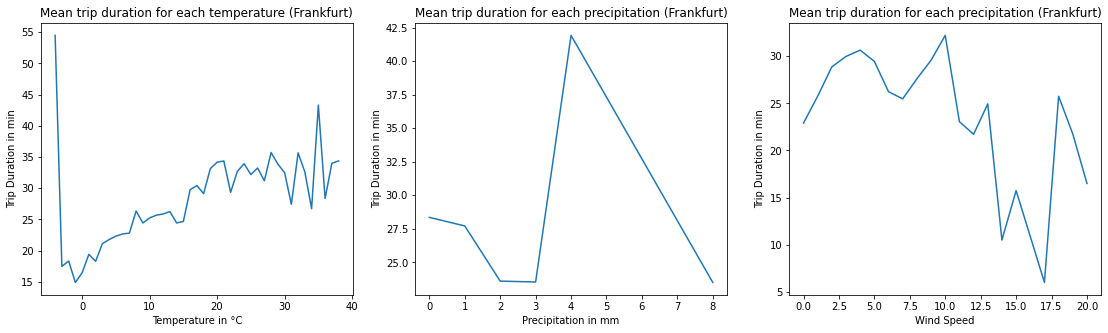

In [35]:
diag, axes = plt.subplots(1, 3, figsize=(19, 5))

# subplot 1: Mean trip duration for each temperature
data_du_t = pd.DataFrame()
data_du_t = df_f[['temperature', 'trip_duration']]
data_du_t = data_du_t.groupby([data_du_t.temperature]).mean()
data_du_t.sort_index(inplace=True)

axes[0].plot(data_du_t.index, data_du_t.trip_duration, label='Mean trip duration for each temperature')
axes[0].set_title("Mean trip duration for each temperature (Frankfurt)")
axes[0].set_xlabel('Temperature in °C') 
axes[0].set_ylabel('Trip Duration in min')

# subplot 2: Mean trip duration for each precipitation
data_du_p = pd.DataFrame()
data_du_p = df_f[['precipitation', 'trip_duration']]
data_du_p = data_du_p.groupby([data_du_p.precipitation]).mean()
data_du_p.sort_index(inplace=True)

axes[1].plot(data_du_p.index, data_du_p.trip_duration, label='Mean trip duration for each precipitation')
axes[1].set_title("Mean trip duration for each precipitation (Frankfurt)")
axes[1].set_xlabel('Precipitation in mm') 
axes[1].set_ylabel('Trip Duration in min')

# subplot 3: Mean trip duration for each wind speed
data_du_w = pd.DataFrame()
data_du_w = df_f[['wind_speed', 'trip_duration']]
data_du_w = data_du_w.groupby([data_du_w.wind_speed]).mean()
data_du_w.sort_index(inplace=True)

axes[2].plot(data_du_w.index, data_du_w.trip_duration, label='Mean trip duration for each precipitation')
axes[2].set_title("Mean trip duration for each precipitation (Frankfurt)")
axes[2].set_xlabel('Wind Speed') 
axes[2].set_ylabel('Trip Duration in min')

diag.savefig('rp_trip_duration_fw.png')

## 2.3 Trip Distance

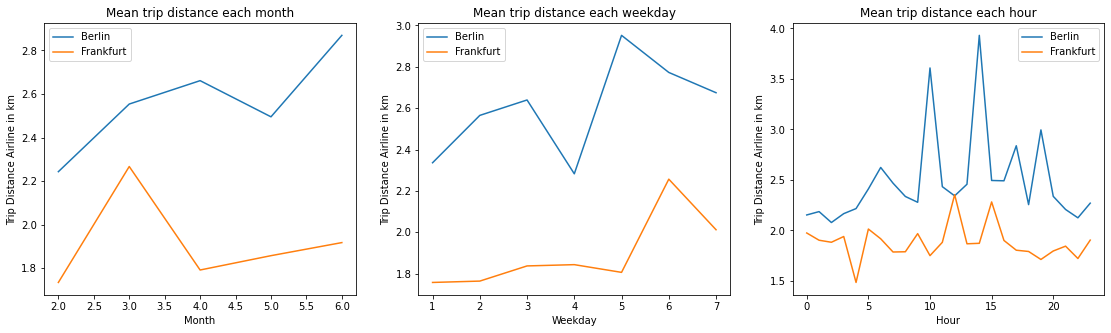

In [36]:
diag, axes = plt.subplots(1, 3, figsize=(19, 5))

# subplot 1: Mean trip distance each month
data_di_m1 = pd.DataFrame()
data_di_m1 = df_b[['month', 'distance']]
data_di_m1 = data_di_m1.groupby([data_di_m1.month]).mean()
data_di_m1.sort_index(inplace=True)

data_di_m2 = pd.DataFrame()
data_di_m2 = df_f[['month', 'distance']]
data_di_m2 = data_di_m2.groupby([data_di_m2.month]).mean()
data_di_m2.sort_index(inplace=True)

axes[0].plot(data_di_m1.index, data_di_m1.distance, label='Berlin')
axes[0].plot(data_di_m2.index, data_di_m2.distance, label='Frankfurt')
axes[0].legend()
axes[0].set_title("Mean trip distance each month")
axes[0].set_xlabel('Month') 
axes[0].set_ylabel('Trip Distance Airline in km')

# subplot 2: Mean trip distance each weekday
data_di_w1 = pd.DataFrame()
data_di_w1 = df_b[['weekday', 'distance']]
data_di_w1 = data_di_w1.groupby([data_di_w1.weekday]).mean()
data_di_w1.sort_index(inplace=True)

data_di_w2 = pd.DataFrame()
data_di_w2 = df_f[['weekday', 'distance']]
data_di_w2 = data_di_w2.groupby([data_di_w2.weekday]).mean()
data_di_w2.sort_index(inplace=True)
                     
axes[1].plot(data_di_w1.index, data_di_w1.distance, label='Berlin')
axes[1].plot(data_di_w2.index, data_di_w2.distance, label='Frankfurt')
axes[1].legend()
axes[1].set_title("Mean trip distance each weekday")
axes[1].set_xlabel('Weekday') 
axes[1].set_ylabel('Trip Distance Airline in km')

# subplot 3: Mean trip distance each hour
data_di_d1 = pd.DataFrame()
data_di_d1 = df_b[['hour', 'distance']]
data_di_d1 = data_di_d1.groupby([data_di_d1.hour]).mean()
data_di_d1.sort_index(inplace=True)

data_di_d2 = pd.DataFrame()
data_di_d2 = df_f[['hour', 'distance']]
data_di_d2 = data_di_d2.groupby([data_di_d2.hour]).mean()
data_di_d2.sort_index(inplace=True)
                     
axes[2].plot(data_di_d1.index, data_di_d1.distance, label='Berlin')
axes[2].plot(data_di_d2.index, data_di_d2.distance, label='Frankfurt')
axes[2].legend()
axes[2].set_title("Mean trip distance each hour")
axes[2].set_xlabel('Hour') 
axes[2].set_ylabel('Trip Distance Airline in km')

diag.savefig('rp_distance_bf.png')

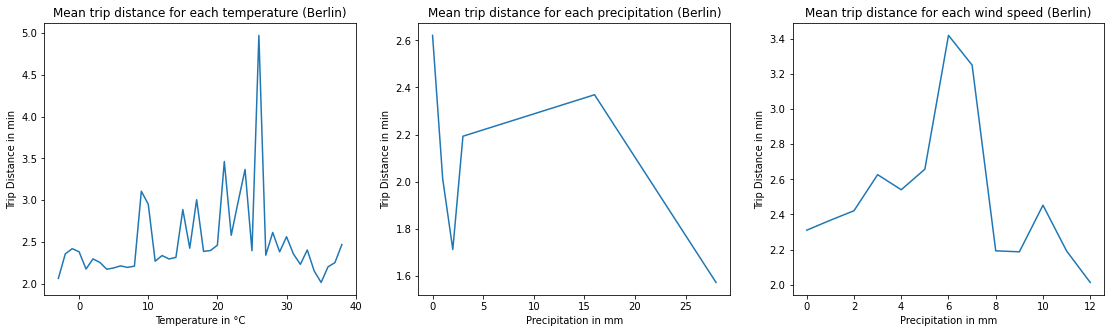

In [37]:
diag, axes = plt.subplots(1, 3, figsize=(19, 5))

# subplot 1: Mean trip duration for each temperature
data_di_t = pd.DataFrame()
data_di_t = df_b[['temperature', 'distance']]
data_di_t = data_di_t.groupby([data_di_t.temperature]).mean()
data_di_t.sort_index(inplace=True)

axes[0].plot(data_di_t.index, data_di_t.distance, label='Mean trip distance for each temperature')
axes[0].set_title("Mean trip distance for each temperature (Berlin)")
axes[0].set_xlabel('Temperature in °C') 
axes[0].set_ylabel('Trip Distance in min')

# subplot 2: Mean trip duration for each precipitation
data_di_p = pd.DataFrame()
data_di_p = df_b[['precipitation', 'distance']]
data_di_p = data_di_p.groupby([data_di_p.precipitation]).mean()
data_di_p.sort_index(inplace=True)

axes[1].plot(data_di_p.index, data_di_p.distance, label='Mean trip distance for each precipitation')
axes[1].set_title("Mean trip distance for each precipitation (Berlin)")
axes[1].set_xlabel('Precipitation in mm') 
axes[1].set_ylabel('Trip Distance in min')

# subplot 2: Mean trip duration for each precipitation
data_di_w = pd.DataFrame()
data_di_w = df_b[['wind_speed', 'distance']]
data_di_w = data_di_w.groupby([data_di_w.wind_speed]).mean()
data_di_w.sort_index(inplace=True)

axes[2].plot(data_di_w.index, data_di_w.distance, label='Mean trip distance for each wind speed')
axes[2].set_title("Mean trip distance for each wind speed (Berlin)")
axes[2].set_xlabel('Precipitation in mm') 
axes[2].set_ylabel('Trip Distance in min')

diag.savefig('rp_distance_bw.png')

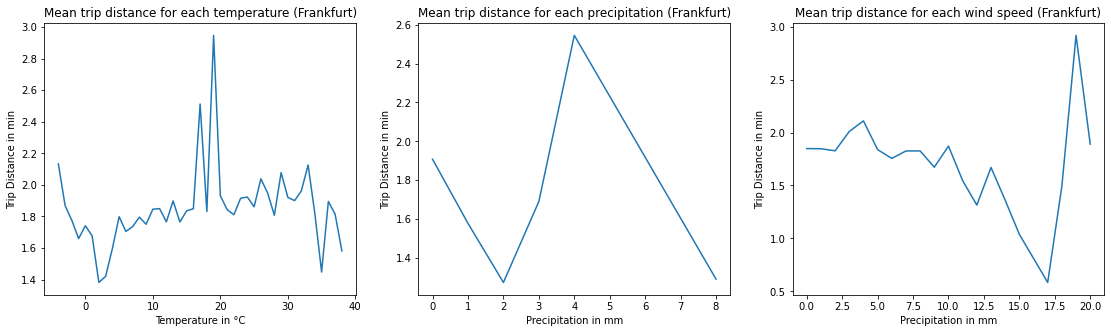

In [38]:
diag, axes = plt.subplots(1, 3, figsize=(19, 5))

# subplot 1: Mean trip duration for each temperature
data_di_t = pd.DataFrame()
data_di_t = df_f[['temperature', 'distance']]
data_di_t = data_di_t.groupby([data_di_t.temperature]).mean()
data_di_t.sort_index(inplace=True)

axes[0].plot(data_di_t.index, data_di_t.distance, label='Mean trip distance for each temperature')
axes[0].set_title("Mean trip distance for each temperature (Frankfurt)")
axes[0].set_xlabel('Temperature in °C') 
axes[0].set_ylabel('Trip Distance in min')

# subplot 2: Mean trip duration for each precipitation
data_di_p = pd.DataFrame()
data_di_p = df_f[['precipitation', 'distance']]
data_di_p = data_di_p.groupby([data_di_p.precipitation]).mean()
data_di_p.sort_index(inplace=True)

axes[1].plot(data_di_p.index, data_di_p.distance, label='Mean trip distance for each precipitation')
axes[1].set_title("Mean trip distance for each precipitation (Frankfurt)")
axes[1].set_xlabel('Precipitation in mm') 
axes[1].set_ylabel('Trip Distance in min')

# subplot 2: Mean trip duration for each precipitation
data_di_w = pd.DataFrame()
data_di_w = df_f[['wind_speed', 'distance']]
data_di_w = data_di_w.groupby([data_di_w.wind_speed]).mean()
data_di_w.sort_index(inplace=True)

axes[2].plot(data_di_w.index, data_di_w.distance, label='Mean trip distance for each wind speed')
axes[2].set_title("Mean trip distance for each wind speed (Frankfurt)")
axes[2].set_xlabel('Precipitation in mm') 
axes[2].set_ylabel('Trip Distance in min')

diag.savefig('rp_distance_fw.png')

# 3. Temperature Overview

## 3.1 Berlin

In [39]:
df = pd.read_csv(r"C:\Users\geibe\Desktop\aa_project-main\Abgabe\Data\berlin_final.csv")
df_w = pd.read_csv(r"C:\Users\geibe\Desktop\aa_project-main\Abgabe\Data\berlin_weather.csv")
df_w.datetime = pd.to_datetime(df_w.datetime)

In [40]:
df[(df["month"] == 2) & (df["date"] == 1) & (df["hour"] == 2)].size

34

In [41]:
def get_trips(datetime):
    return df[(df["month"] == datetime.month) & (df["date"] == datetime.day) & (df["hour"] == datetime.hour)].size

In [42]:
df_w["num_trips"] = df_w["datetime"].apply(get_trips)

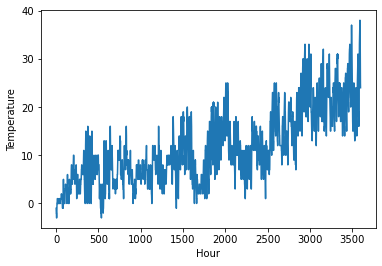

In [43]:
data_w = pd.DataFrame()
data_w['temperature'] = df_w.temperature.astype(int)
data_w.sort_index(inplace=True)
plt.plot(data_w.index, data_w.temperature, label='Trips per hour')
plt.ylabel('Temperature')
plt.xlabel('Hour')
plt.show()

## 3.2 Frankfurt (Main)

In [44]:
df = pd.read_csv(r"C:\Users\geibe\Desktop\aa_project-main\Abgabe\Data\frankfurt_final.csv")
df_w = pd.read_csv(r"C:\Users\geibe\Desktop\aa_project-main\Abgabe\Data\frankfurt_weather.csv")
df_w.datetime = pd.to_datetime(df_w.datetime)

In [45]:
df[(df["month"] == 2) & (df["date"] == 1) & (df["hour"] == 2)].size

0

In [46]:
def get_trips(datetime):
    return df[(df["month"] == datetime.month) & (df["date"] == datetime.day) & (df["hour"] == datetime.hour)].size

In [47]:
df_w["num_trips"] = df_w["datetime"].apply(get_trips)

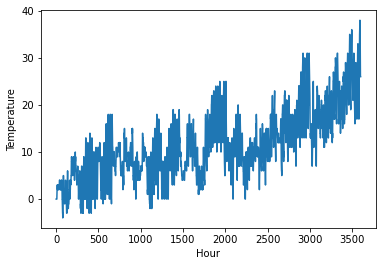

In [48]:
data_w = pd.DataFrame()
data_w['temperature'] = df_w.temperature.astype(int)
data_w.sort_index(inplace=True)
plt.plot(data_w.index, data_w.temperature, label='Trips per hour')
plt.ylabel('Temperature')
plt.xlabel('Hour')
plt.show()